In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [17]:
company='PETR4.SA'
start = dt.datetime(2020,1,1)
end = dt.datetime(2021,1,1)

In [18]:
data = web.DataReader(company,'yahoo',start,end)

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [20]:
prediction_days = 60
x_train = []
y_train = []

In [21]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [22]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [23]:
model = Sequential()

In [24]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [25]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [26]:
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
6/6 [==============================] - 5s 72ms/step - loss: 0.1652
Epoch 2/25
6/6 [==============================] - 0s 72ms/step - loss: 0.0316
Epoch 3/25
6/6 [==============================] - 0s 72ms/step - loss: 0.0146
Epoch 4/25
6/6 [==============================] - 0s 75ms/step - loss: 0.0137
Epoch 5/25
6/6 [==============================] - 0s 74ms/step - loss: 0.0113
Epoch 6/25
6/6 [==============================] - 0s 74ms/step - loss: 0.0125
Epoch 7/25
6/6 [==============================] - 1s 85ms/step - loss: 0.0098
Epoch 8/25
6/6 [==============================] - 1s 88ms/step - loss: 0.0091
Epoch 9/25
6/6 [==============================] - 0s 72ms/step - loss: 0.0082
Epoch 10/25
6/6 [==============================] - 0s 73ms/step - loss: 0.0084
Epoch 11/25
6/6 [==============================] - 0s 79ms/step - loss: 0.0091
Epoch 12/25
6/6 [==============================] - 0s 77ms/step - loss: 0.0082
Epoch 13/25
6/6 [==============================] - 0s 75ms/st

In [27]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company,'yahoo',test_start,test_end)

In [28]:
actual_prices = test_data['Close'].values

In [29]:
total_dataset = pd.concat((data['Close'], test_data['Close']),axis=0)

In [31]:
model_inputs = total_dataset[len(total_dataset)-len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1) 
model_inputs = scaler.transform(model_inputs)

In [32]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

In [33]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [35]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

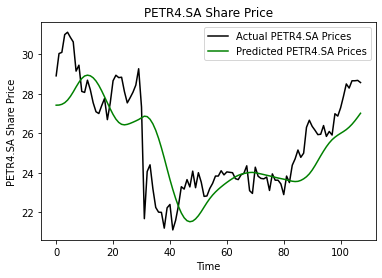

In [37]:
plt.plot(actual_prices, color='black', label=f'Actual {company} Prices')
plt.plot(predicted_prices, color='green', label=f'Predicted {company} Prices')
plt.title(f'{company} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()